# **Use CASCADE to infer spiking activity for your own data**
---

<font size = 3>This is a demo script for the inference of spiking activity from calcium imaging data.

<font size = 3>The function **load_neurons_x_time()** loads the input data as a matrix. It can
be modified by the user to load npy-files, mat-files or any other standard format.

<font size = 3>After loading the dF/F data, some example traces are plotted.
    
<font size = 3>The line **spike_rates = cascade.predict( model_name, traces )** performs the
predictions. As input, it uses the loaded calcium recordings ('traces') and
the pretrained model ('model_name'). To train a new model (usually not necessary), check out the companion Jupyter notebook.    
    
<font size = 3>The output is a matrix with the inferred spike rates.
    
---

## 1. Import python packages

<font size = 3> Imports standard python packages, and the main CASCADE packages (cascade2p).

In [2]:
import os

if 'Notebooks' in os.getcwd(): os.chdir('..')  # change to main directory
print('Current directory: {}'.format( os.getcwd() ))

import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.io as sio

# local folder
from cascade2p import cascade
from cascade2p.utils import plot_dFF_traces, plot_noise_level_distribution, plot_noise_matched_ground_truth

from cascade2p import checks
checks.check_packages()


Current directory: /home/pierre/Desktop/git_env/Calibrated-inference-of-spiking
	YAML reader installed (version 0.16.10).
	Keras installed (version 2.1.6).
	Tensorflow installed (version 1.13.1).


## 2. Load your own calcium imaging data

### Define your own function to load data as 2d array (neurons, time)

<font size = 3>The function should return a 2D array (neurons x time) with dF/F values (numeric values, not percent).
    
<font size = 3>Sometimes data are in a different format (time x neurons) or dF/F values are given in percent. In this case, correct by transposing the data (*traces = traces.T*) or by converting from percent to numeric (*traces = traces / 100*).

In [3]:
def load_neurons_x_time(file_path):
    """Custom method to load data as 2d array with shape (neurons, nr_timepoints)"""
    
    # replace this with your own code if necessary
    # traces = np.load(file_path)
    
    # # here numpy dictionary with key 'dff'
    traces = np.load(file_path, allow_pickle=True).item()['dff']
    
    return traces

def load_neurons_x_time(file_path):
    """Custom method to load data as 2d array with shape (neurons, nr_timepoints)"""
    
    traces = sio.loadmat(file_path)['dF_traces'] 
    
    return traces.T/100

### Verify that the data were loaded correctly

Important: modify folder name (*example_file*) and imaging frame rate (*frame_rate*)!

Number of neurons in dataset: 1005
Number of timepoints in dataset: 260


/home/pierre/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


<IPython.core.display.Javascript object>


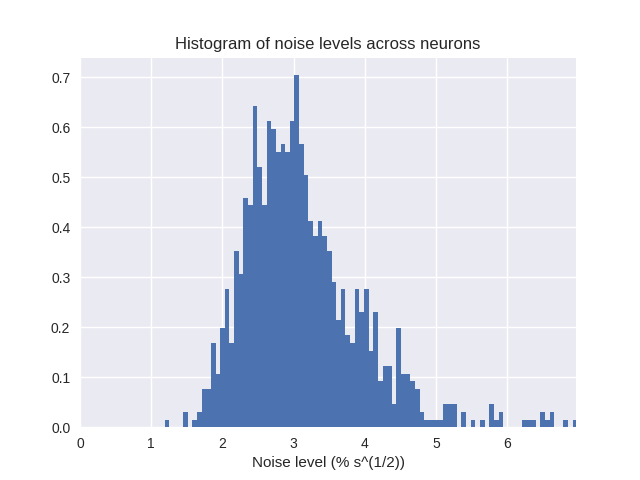

/home/pierre/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


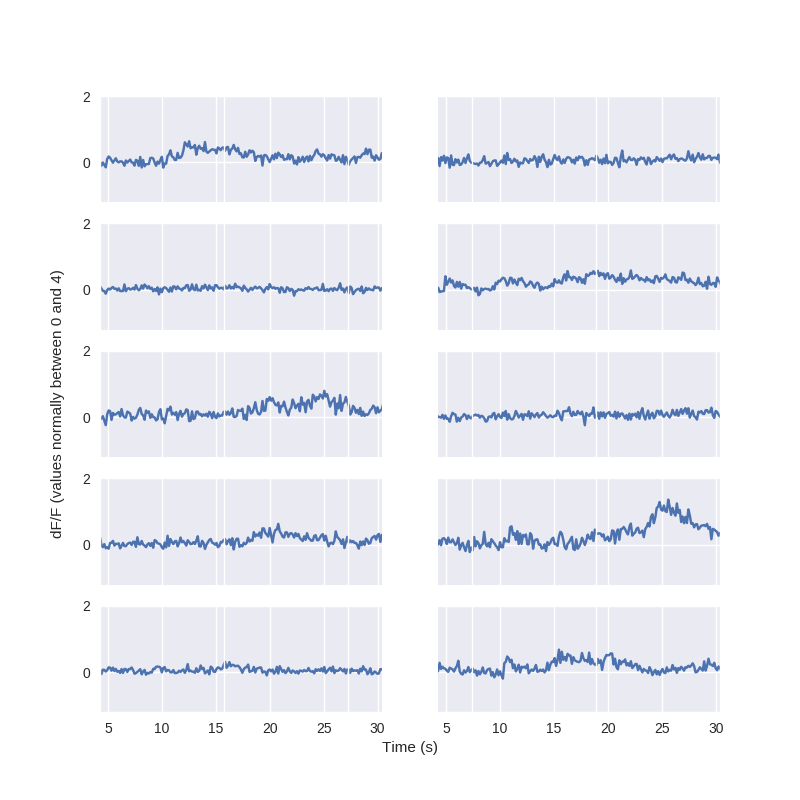

In [4]:
example_file = 'Example_datasets/Multiplane-OGB1-zf-pDp-Rupprecht-7.5Hz/Calcium_traces_04.mat'

traces = load_neurons_x_time( example_file )
frame_rate = 7.5


print('Number of neurons in dataset:', traces.shape[0])
print('Number of timepoints in dataset:', traces.shape[1])

# interactive plotting
%matplotlib notebook

noise_levels = plot_noise_level_distribution(traces,frame_rate)

plt.rcParams['figure.figsize'] = (8.0, 8.0)
neuron_indices = np.random.randint(traces.shape[0], size=10)
plot_dFF_traces(traces,neuron_indices,frame_rate)

## 3. Infer spike rates from calcium data 

### Load pretrained model

In [20]:
model_name = 'OGB_zf_pDp_7.5Hz'
traces_file_name = 'Example_datasets/Multiplane-OGB1-zf-pDp-Rupprecht-7.5Hz/Calcium_traces_04.mat'

traces = load_neurons_x_time( traces_file_name )

### Predict spike rates

In [21]:
spike_rates = cascade.predict( model_name, traces )

Loaded model was trained at frame rate 7.5 Hz
Given argument traces contains 1005 neurons and 260 frames.
[1.82316422 2.45927152 2.37170293 ... 2.86554355 2.27570475 2.05822552]


/home/pierre/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)



Predictions for noise level 2:


/home/pierre/Desktop/git_env/Calibrated-inference-of-spiking/cascade2p/cascade.py:200: RuntimeWarning: invalid value encountered in less
  neuron_idx = np.where( trace_noise_levels < model_noise + 0.5 )[0]


	... ensemble 0
58240/58240 [==============================] - 0s 2us/step
	... ensemble 1
58240/58240 [==============================] - 0s 3us/step
	... ensemble 2
58240/58240 [==============================] - 0s 3us/step
	... ensemble 3
58240/58240 [==============================] - 0s 3us/step
	... ensemble 4
58240/58240 [==============================] - 0s 3us/step

Predictions for noise level 3:


/home/pierre/Desktop/git_env/Calibrated-inference-of-spiking/cascade2p/cascade.py:204: RuntimeWarning: invalid value encountered in greater_equal
  neuron_idx = np.where( (trace_noise_levels >= model_noise - 0.5) & (trace_noise_levels < model_noise + 0.5) )[0]
/home/pierre/Desktop/git_env/Calibrated-inference-of-spiking/cascade2p/cascade.py:204: RuntimeWarning: invalid value encountered in less
  neuron_idx = np.where( (trace_noise_levels >= model_noise - 0.5) & (trace_noise_levels < model_noise + 0.5) )[0]


	... ensemble 0
135980/135980 [==============================] - 0s 1us/step
	... ensemble 1
135980/135980 [==============================] - 0s 1us/step
	... ensemble 2
135980/135980 [==============================] - 0s 1us/step
	... ensemble 3
135980/135980 [==============================] - 0s 1us/step
	... ensemble 4
135980/135980 [==============================] - 0s 1us/step

Predictions for noise level 4:
	... ensemble 0
49920/49920 [==============================] - 0s 3us/step
	... ensemble 1
49920/49920 [==============================] - 0s 3us/step
	... ensemble 2
49920/49920 [==============================] - 0s 3us/step
	... ensemble 3
49920/49920 [==============================] - 0s 3us/step
	... ensemble 4
49920/49920 [==============================] - 0s 3us/step

Predictions for noise level 5:
	... ensemble 0
11700/11700 [==============================] - 0s 9us/step
	... ensemble 1
11700/11700 [==============================] - 0s 10us/step
	... ensemble 2
11700/117

/home/pierre/Desktop/git_env/Calibrated-inference-of-spiking/cascade2p/cascade.py:202: RuntimeWarning: invalid value encountered in greater_equal
  neuron_idx = np.where( trace_noise_levels >= model_noise - 0.5 )[0]


	... ensemble 0
2080/2080 [==============================] - 0s 46us/step
	... ensemble 1
2080/2080 [==============================] - 0s 50us/step
	... ensemble 2
2080/2080 [==============================] - 0s 59us/step
	... ensemble 3
2080/2080 [==============================] - 0s 54us/step
	... ensemble 4
2080/2080 [==============================] - 0s 52us/step
Done


## 4. Save results to a data file

In [7]:
folder = os.path.dirname(traces_file_name)
save_path = os.path.join(folder, 'full_prediction_'+os.path.basename(traces_file_name))

# save as numpy file
np.save(save_path, spike_rates)

# save as .mat file
# import scipy.io as sio
# sio.savemat(save_path, {'spike_rates': spike_rates})

## 5. Plot the results together with calcium traces

<IPython.core.display.Javascript object>


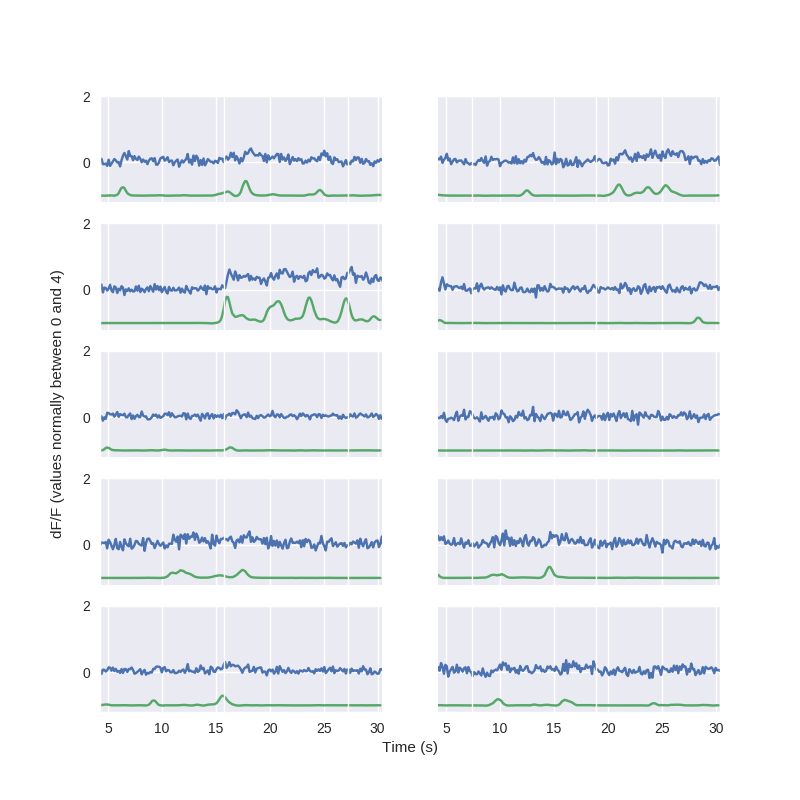

In [19]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)
neuron_indices = np.random.randint(traces.shape[0], size=10)
plot_dFF_traces(traces,neuron_indices,frame_rate,spike_rates)

## 6. Plot noise-matched calcium traces from the ground truth

<IPython.core.display.Javascript object>


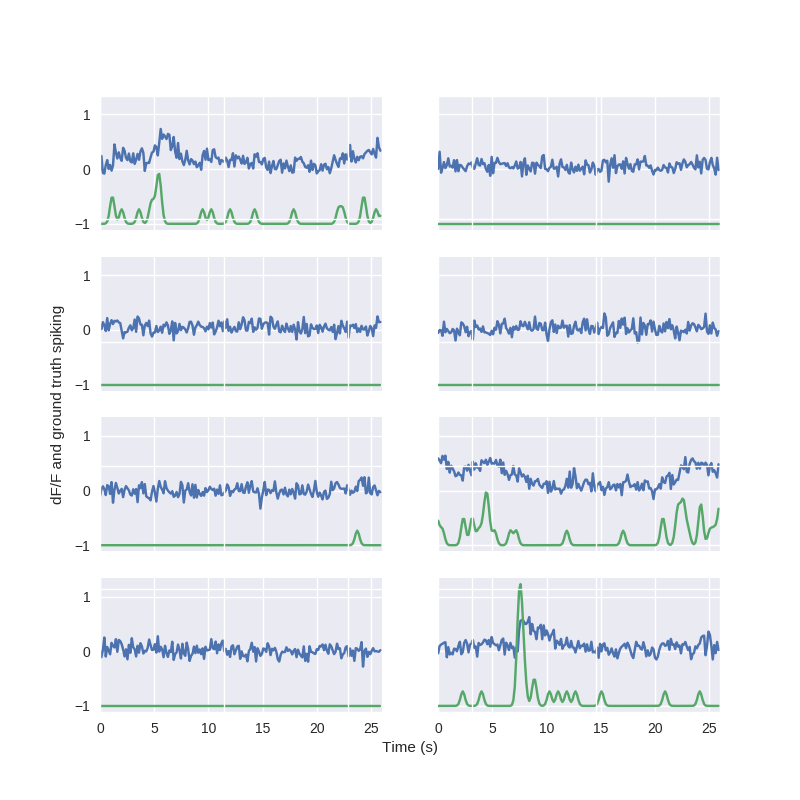

In [18]:
median_noise = np.round(np.median(noise_levels))
nb_traces = 8
duration = 26 # seconds
plot_noise_matched_ground_truth( model_name, median_noise, frame_rate, nb_traces, duration )